## <center>TALLER PANDAS</center>

In [52]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

In [2]:
db=pd.read_csv("PRSA_data_2010.1.1-2014.12.31.csv")

In [4]:
db.head()#para extraer ciertos primeros datos

,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
0,1,2010,1,1,0,NaN,-21,-11.0,1021.0,NW,1.79,0,0
1,2,2010,1,1,1,NaN,-21,-12.0,1020.0,NW,4.92,0,0
2,3,2010,1,1,2,NaN,-21,-11.0,1019.0,NW,6.71,0,0
3,4,2010,1,1,3,NaN,-21,-14.0,1019.0,NW,9.84,0,0
4,5,2010,1,1,4,NaN,-20,-12.0,1018.0,NW,12.97,0,0


In [5]:
db.tail(1) # extraer ciertos últimos datos

,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
43823,43824,2014,12,31,23,12.0,-21,-3.0,1034.0,NW,249.85,0,0


In [6]:
db.columns

Index(['No', 'year', 'month', 'day', 'hour', 'pm2.5', 'DEWP', 'TEMP', 'PRES',
       'cbwd', 'Iws', 'Is', 'Ir'],
      dtype='object')

#### Punto 1 Indices pertinentes
##### Pienso que es importantes poner un indice de fecha haciendo énfasis en que se agrupe en una sola variable dia, mes y año.

In [ ]:
p1=db
p1.year=p1.year.astype(str)
p1.month=p1.month.astype(str)
p1.day=p1.day.astype(str)
p1.hour=p1.hour.astype(str)
p11=pd.DataFrame([p1.year,p1.month,p1.day])
p11
p1_=pd.to_datetime(p11)


#db_p1=db.pivot(index='year',columns='month',values=['pm2.5','TEMP'])
#db_p1.head()

#### Punto 2: Eliminando los datos NaN de la columnna pm2.5

In [11]:
bd2=db.dropna(subset=["pm2.5"],axis=0,inplace=False)
bd2

,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
24,25,2010,1,2,0,129.0,-16,-4.0,1020.0,SE,1.79,0,0
25,26,2010,1,2,1,148.0,-15,-4.0,1020.0,SE,2.68,0,0
26,27,2010,1,2,2,159.0,-11,-5.0,1021.0,SE,3.57,0,0
27,28,2010,1,2,3,181.0,-7,-5.0,1022.0,SE,5.36,1,0
28,29,2010,1,2,4,138.0,-7,-5.0,1022.0,SE,6.25,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
43819,43820,2014,12,31,19,8.0,-23,-2.0,1034.0,NW,231.97,0,0
43820,43821,2014,12,31,20,10.0,-22,-3.0,1034.0,NW,237.78,0,0
43821,43822,2014,12,31,21,10.0,-22,-3.0,1034.0,NW,242.70,0,0
43822,43823,2014,12,31,22,8.0,-22,-4.0,1034.0,NW,246.72,0,0


#### Punto 3: Describe por año

In [12]:
p3=bd2.groupby('year')
p3.describe().TEMP


,count,mean,std,min,25%,50%,75%,max
year,,,,,,,,
2010,8091.0,11.313805,12.684701,-19.0,0.0,11.0,23.0,41.0
2011,8032.0,12.407869,12.095837,-15.0,2.0,14.0,23.0,36.0
2012,8295.0,12.109946,12.339970,-17.0,1.0,14.0,23.0,38.0
2013,8678.0,12.383614,12.033222,-17.0,2.0,13.0,23.0,38.0
2014,8661.0,13.709156,11.616259,-13.0,3.0,15.0,23.0,42.0


Se realizará un boxplot para observar los datos para comparar los datos obtenidos por la función describe

<AxesSubplot:xlabel='year', ylabel='TEMP'>

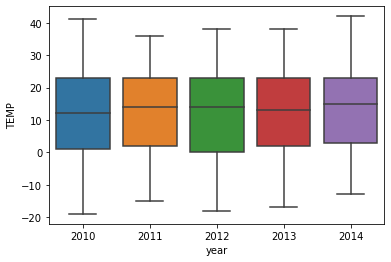

In [103]:
X=db['year']
Y=db['TEMP']
sns.boxplot(x=X,y=Y,data=db)


Si se analizan los cuartiles de la caja correspondiente al año 2010, se puede observar que concuerdan con los datos obtenidos en el describe en donde la temperatura media en este año 11,63

#### Punto 4: Diagrama de dispersión para pm2.5 y TEMP

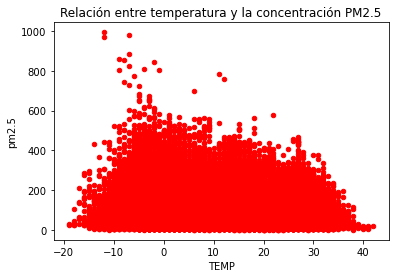

In [104]:
graph=bd2.plot.scatter('TEMP','pm2.5',color='red')
graph.set_title("Relación entre temperatura y la concentración PM2.5")
plt.show()

Como se puede observar en el gráfico de dispersión, en temperaturas que oscilan entre -10°C y 0°C se presenta una concentración mayor de PM2.5 (material particulado). Además, se puede observar una tendencia de decrecimiento de la concentración de material particulado a la medida que la temperatura aumenta (desde -10°C hasta 40°C)

#### Punto 5: Probabilidad de un valor mayor en PM2.5 de 120

In [13]:
prob=bd2[bd2['pm2.5']>120]
x=prob.count()
data1=len(prob)
data2=len(bd2)
probab=(data1/data2)*100
print("La probablidad de encontrar un valor mayor de 120 es",probab,"%")

La probablidad de encontrar un valor mayor de 120 es 29.894388964724477 %


#### Punto 6: Agrupación y promedio

In [230]:
p8=bd2.groupby('year')[['pm2.5']].mean().sort_values('pm2.5')
p8

,pm2.5
year,
2012,90.545871
2014,97.734557
2011,99.071340
2013,101.712376
2010,104.045730
